# Experiment "ZND-solutions for various $Q$"

Plot ZND solutions for different values of heat release.

Imports:

In [1]:
%matplotlib inline
import os
import sys

import matplotlib.pyplot as plt

from saf.euler1d.linear.asciireader import ASCIIReader
from saf.linear.postprocessor import Postprocessor

from helpers import savefig

---
## Helper functions

In [2]:
def znd_read_data():
    output_dir = '_output'
    dirs = os.listdir(output_dir)
    dirs.sort()
    
    x = []
    rho = []
    u = []
    p = []
    lamda = []

    for d in dirs:
        dirname = os.path.join(output_dir, d)

        r = ASCIIReader(dirname)

        znd_data = r.get_znd_data()
        x.append(znd_data['x'])
        rho.append((d, znd_data['rho']))
        u.append((d, znd_data['u_lab']))
        p.append((d, znd_data['p']))
        lamda.append((d, znd_data['lamda']))
        
    return x, rho, u, p, lamda

def _znd_plot_quantity(x, quantity, axis, k):
    line_styles = ['-', '--', ':', '-o', '-*']
    assert k >= 0
    assert k < len(line_styles)
    if k != 3 and k != 4:
        axis.plot(x, quantity, line_styles[k])
    else:
        ls =line_styles[k]
        s1 = ls[0]
        s2 = ls[1]
        R = 10
        line, = axis.plot(x, quantity, s1)
        color = line.get_color()
        axis.plot(x[::R], quantity[::R], s2, color=color, markeredgecolor=color)

def znd_plot_data(x, rho, u, p, lamda):
    # Number of rows and columns in figures
    m, n = 3, 2
    E_ACT = 30.0
    X_LIM = -8
    
    fig, axes = plt.subplots(nrows=m, ncols=n, figsize=(6, 6))

    assert len(x) == len(rho)
    assert len(x) == len(u)
    assert len(x) == len(p)
    assert len(x) == len(lamda)

    # Density
    ax = axes[0, 0]
    for k, __ in enumerate(rho):
        cur_x = x[k]
        cur_rho = rho[k][1]
        cur_rho = cur_rho/cur_rho[-1]

        _znd_plot_quantity(cur_x, cur_rho, ax, k)
    ax.set_ylabel(r'$\bar{\rho}/\bar{\rho}_{\mathrm{s}}$')
    ax.set_xlabel(r'$x$')
    ax.set_xlim((X_LIM, 0))
    ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_ylim((0, 1.0))
        
    # Progress variable
    ax = axes[0, 1]
    for k, __ in enumerate(lamda):
        cur_x = x[k]
        cur_lamda = lamda[k][1]

        _znd_plot_quantity(cur_x, cur_lamda, ax, k)
    ax.set_ylabel(r'$\bar{\lambda}$')
    ax.set_xlabel(r'$x$')
    ax.set_xlim((X_LIM, 0))
    ax.set_ylim((0, 1.0))
            
    # Pressure
    ax = axes[1, 0]
    for k, __ in enumerate(p):
        cur_x = x[k]
        cur_p = p[k][1]
        cur_p = cur_p/cur_p[-1]

        _znd_plot_quantity(cur_x, cur_p, ax, k)
    ax.set_ylabel(r'$\bar{p}/\bar{p}_{\mathrm{s}}$')
    ax.set_xlabel(r'$x$')
    ax.set_xlim((X_LIM, 0))
    ax.set_ylim((0.5, 1.0))
        
    # Velocity
    ax = axes[1, 1]
    for k, __ in enumerate(u):
        cur_x = x[k]
        cur_label = u[k][0]
        cur_u = u[k][1]
        cur_u = cur_u/cur_u[-1]

        _znd_plot_quantity(cur_x, cur_u, ax, k)
    ax.set_ylabel(r'$\bar{u}/\bar{u}_{\mathrm{s}}$')
    ax.set_xlabel(r'$x$')
    ax.set_xlim((X_LIM, 0))
    ax.set_ylim((0.5, 1.0))
        
    # Temperature
    ax = axes[2, 0]
    for k, __ in enumerate(p):
        cur_x = x[k]
        cur_p = p[k][1]
        cur_p = cur_p / cur_p[-1]
        cur_rho = rho[k][1]
        cur_rho = cur_rho / cur_rho[-1]
        cur_T = cur_p / cur_rho

        _znd_plot_quantity(cur_x, cur_T, ax, k)
    ax.set_ylabel(r'$\bar{T}/\bar{T}_{\mathrm{s}}$')
    ax.set_xlabel(r'$x$')
    ax.set_xlim((X_LIM, 0))
    ax.set_ylim((0.95, 2.8))
        
    # Reaction rate
    ax = axes[2, 1]
    for k, __ in enumerate(p):
        cur_x = x[k]
        cur_p = p[k][1]
        cur_rho = rho[k][1]
        cur_lamda = lamda[k][1]
        r = (1 - cur_lamda) * np.exp(-E_ACT*cur_rho/(cur_p))
        r = r / np.max(r)

        _znd_plot_quantity(cur_x, r, ax, k)
    ax.set_ylabel(r'$\bar{\omega}/\bar{\omega}_{\mathrm{max}}$')
    ax.set_xlabel(r'$x$')
    ax.set_xlim((X_LIM, 0))
    ax.set_ylim((0, 1.0))
        
    fig.tight_layout(pad=0.1, h_pad=0.55)
    savefig('znd-solutions.pdf')

---
## Reading data

In [3]:
x, rho, u, p, lamda = znd_read_data()

---
## Plotting ZND solutions

The figure below contains profiles of different quantities of ZND solution.
Solid lines is for $Q=0.5$, dashed line is for $Q=1.0$, dotted line is for $Q=10$, solid line with circle marker is for $Q=50$, solid line with star marker is for $Q=100$.

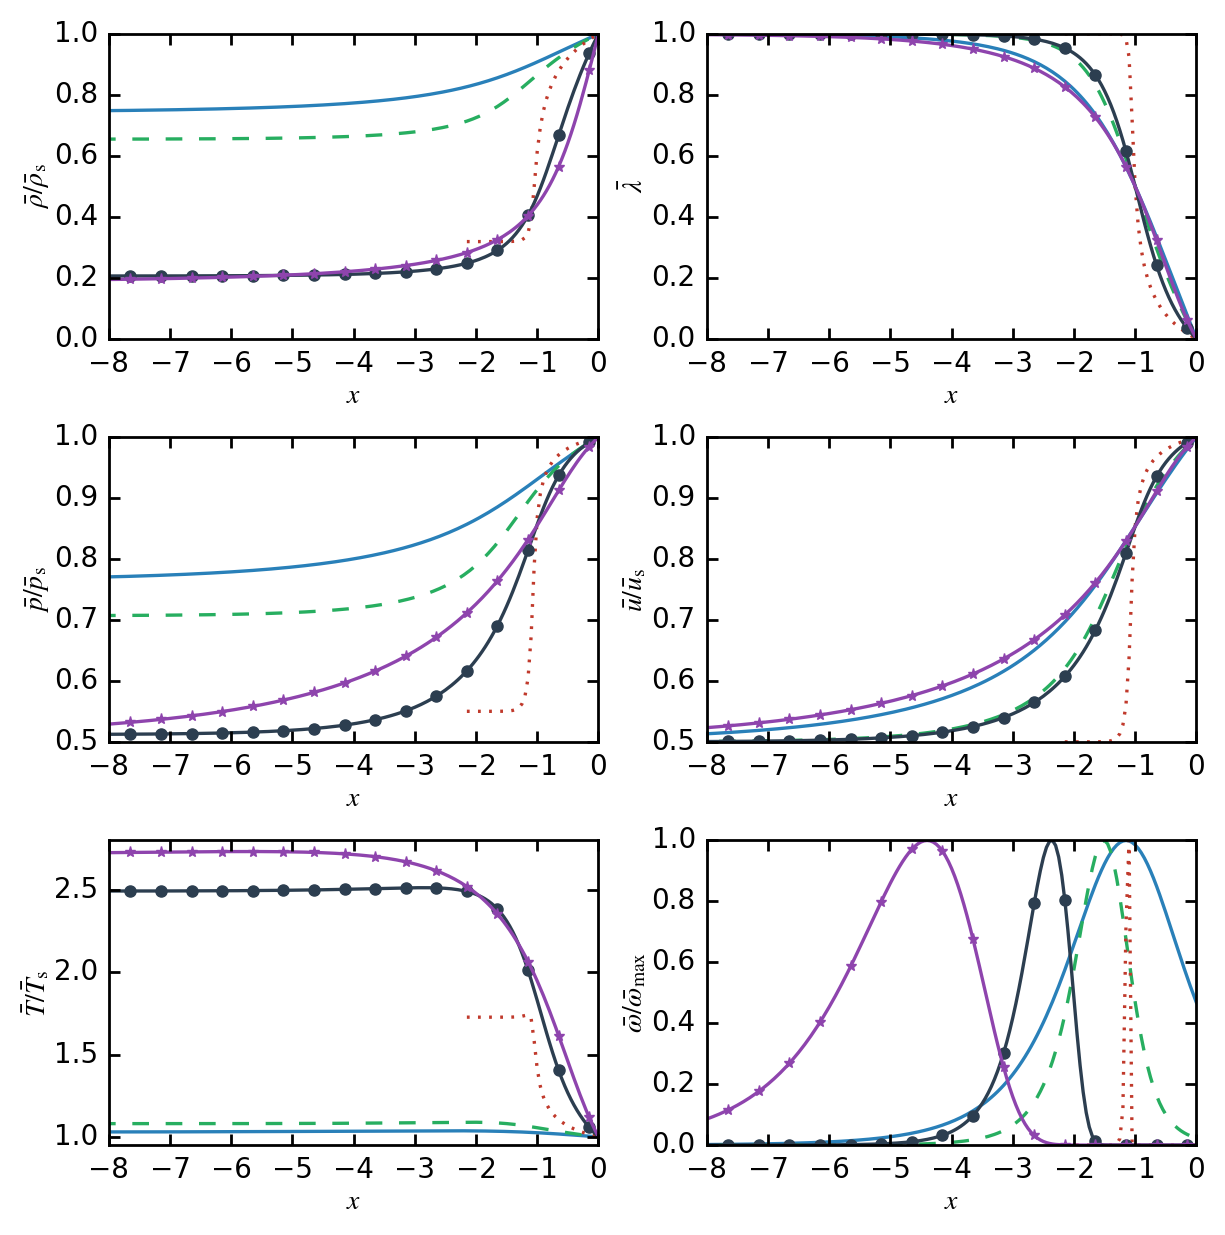

In [4]:
znd_plot_data(x, rho, u, p, lamda)